In [1]:
#import the required libraries and read and display file 
import pandas as pd
df = pd.read_csv("student.csv")
print df.shape
print df.head(33)

(395, 33)
   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
5      GP   M   16       U     LE3       T     4     3  services     other   
6      GP   M   16       U     LE3       T     2     2     other     other   
7      GP   F   17       U     GT3       A     4     4     other   teacher   
8      GP   M   15       U     LE3       A     3     2  services     other   
9      GP   M   15       U     GT3       T     3     4     other     other   
10     GP   F   15       U     GT3       T     4     4   teacher    health   
11     GP   F   15       U     GT3       T     2     1

In [2]:
#display the data types
print df.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [3]:
cleanup_nums = {"school": {"GP": 1, "MS": 2},
"sex": {"F": 1, "M": 2 },
"address": {"U": 1, "R": 2 },
"famsize": {"GT3": 1, "LE3": 2 },
"Pstatus": {"A": 1, "T": 2 },
"Mjob": {"at_home": 1, "health": 2, "other":3, "services":4, "teacher":5 },
"Fjob": {"at_home": 1, "health": 2, "other":3, "services":4, "teacher":5},
"reason": {"course": 1, "other": 2, "home":3, "reputation":4 },
"guardian": {"mother": 1, "father": 2, "other":3},
"schoolsup" : {"yes":1, "no":2},
"famsup" : {"yes":1, "no":2},
"paid" : {"yes":1, "no":2},
"activities" : {"yes":1, "no":2},
"nursery" : {"yes":1, "no":2},
"higher" : {"yes":1, "no":2},
"internet" : {"yes":1, "no":2},
"romantic" : {"yes":1, "no":2}}


              
               
df.replace(cleanup_nums, inplace=True)

In [4]:
#show the converted data types 
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

In [5]:
#display the total number of duplicate rows present 
duplicate_rows_df = df[df.duplicated()]
print "number of duplicate rows: ", duplicate_rows_df.shape

number of duplicate rows:  (0, 33)


In [6]:
#delete duplicates and dispay total number of rows 
df = df.drop_duplicates()

print df.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64


In [7]:
#count the number of null values in each column 
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
#show statistical data for the numerical dataset 
print df.describe()


           school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.116456    1.473418   16.696203    1.222785    1.288608    1.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      1.000000    1.000000   15.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000   16.000000    1.000000    1.000000    2.000000   
50%      1.000000    1.000000   17.000000    1.000000    1.000000    2.000000   
75%      1.000000    2.000000   18.000000    1.000000    2.000000    2.000000   
max      2.000000    2.000000   22.000000    2.000000    2.000000    2.000000   

             Medu        Fedu        Mjob        Fjob     ...          famrel  \
count  395.000000  395.000000  395.000000  395.000000     ...      395.000000   
mean     2.749367    2.521519    3.169620    3.281013     ...        3.944304   
std      1.094735    1.0882

In [9]:
#import libraries for decision tree classifier 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

#split dataset in to training and testing 
from sklearn.model_selection import train_test_split 

from sklearn import metrics

In [10]:
#drop the target variable 
X = df.drop(['G3'], axis=1)

#display the updated dataset
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1,1,18,1,1,1,4,4,1,5,...,2,4,3,4,1,1,3,6,5,6
1,1,1,17,1,1,2,1,1,1,3,...,2,5,3,3,1,1,3,4,5,5
2,1,1,15,1,2,2,1,1,1,3,...,2,4,3,2,2,3,3,10,7,8
3,1,1,15,1,1,2,4,2,2,4,...,1,3,2,2,1,1,5,2,15,14
4,1,1,16,1,1,2,3,3,3,3,...,2,4,3,2,1,2,5,4,6,10


In [11]:
#assign target variable as y
y = df.G3


#display G3 values 
print y[0:33]

0      6
1      6
2     10
3     15
4     10
5     15
6     11
7      6
8     19
9     15
10     9
11    12
12    14
13    11
14    16
15    14
16    14
17    10
18     5
19    10
20    15
21    15
22    16
23    12
24     8
25     8
26    11
27    15
28    11
29    11
30    12
31    17
32    16
Name: G3, dtype: int64


In [12]:
y = df.G3

print y[0:9]

0     6
1     6
2    10
3    15
4    10
5    15
6    11
7     6
8    19
Name: G3, dtype: int64


In [37]:
X_tmp, X_test, y_tmp, y_test =train_test_split(X, y, test_size=0.15, random_state=1) 
X_train, X_test, y_train, y_test = train_test_split(X_tmp, y_tmp, test_size=0.2, random_state=1)

print X_train.shape 

#split dataset in to training and testing set: 70% training and 30% testing 

(268, 32)


In [38]:
clf = DecisionTreeClassifier()
#create a decision tree object 

clf = clf.fit(X_train,y_train)
#classifier (rename clf)

In [39]:
#predict the accuracy of the testing dataset
y_pred = clf.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test, y_pred))

('Accuracy', 0.38805970149253732)


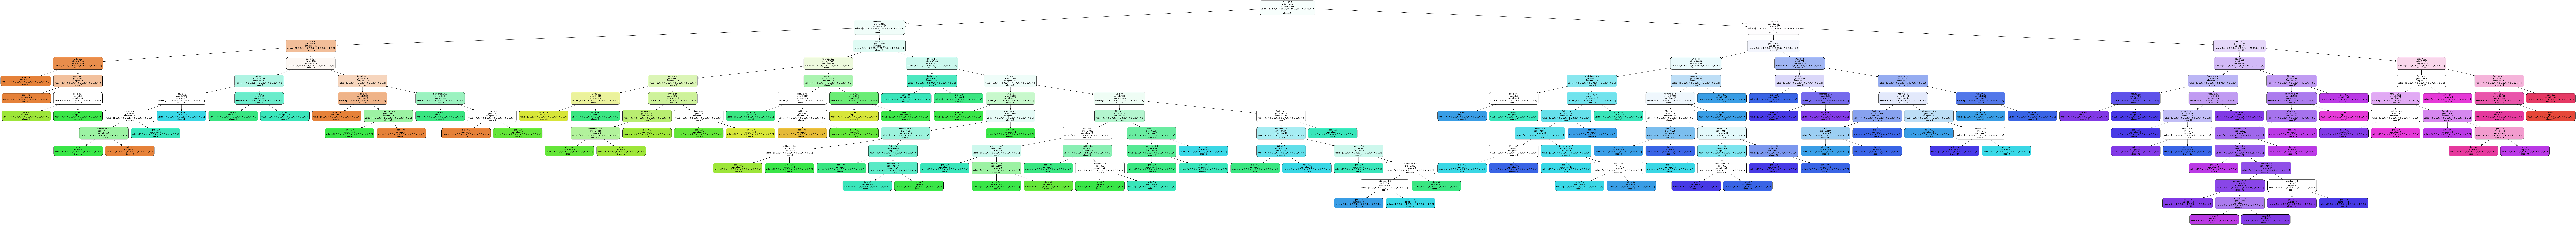

In [40]:
#import required libraries for tree visualisation 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

#select featured columns and classes for the tree
feature_cols = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
               
#format the decion tree and display as png
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('student2.png')
Image(graph.create_png())



In [42]:
#tune the decision tree and predict 

clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf2 = clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_test)


print("Accuracy", metrics.accuracy_score(y_test, y_pred))

('Accuracy', 0.4925373134328358)


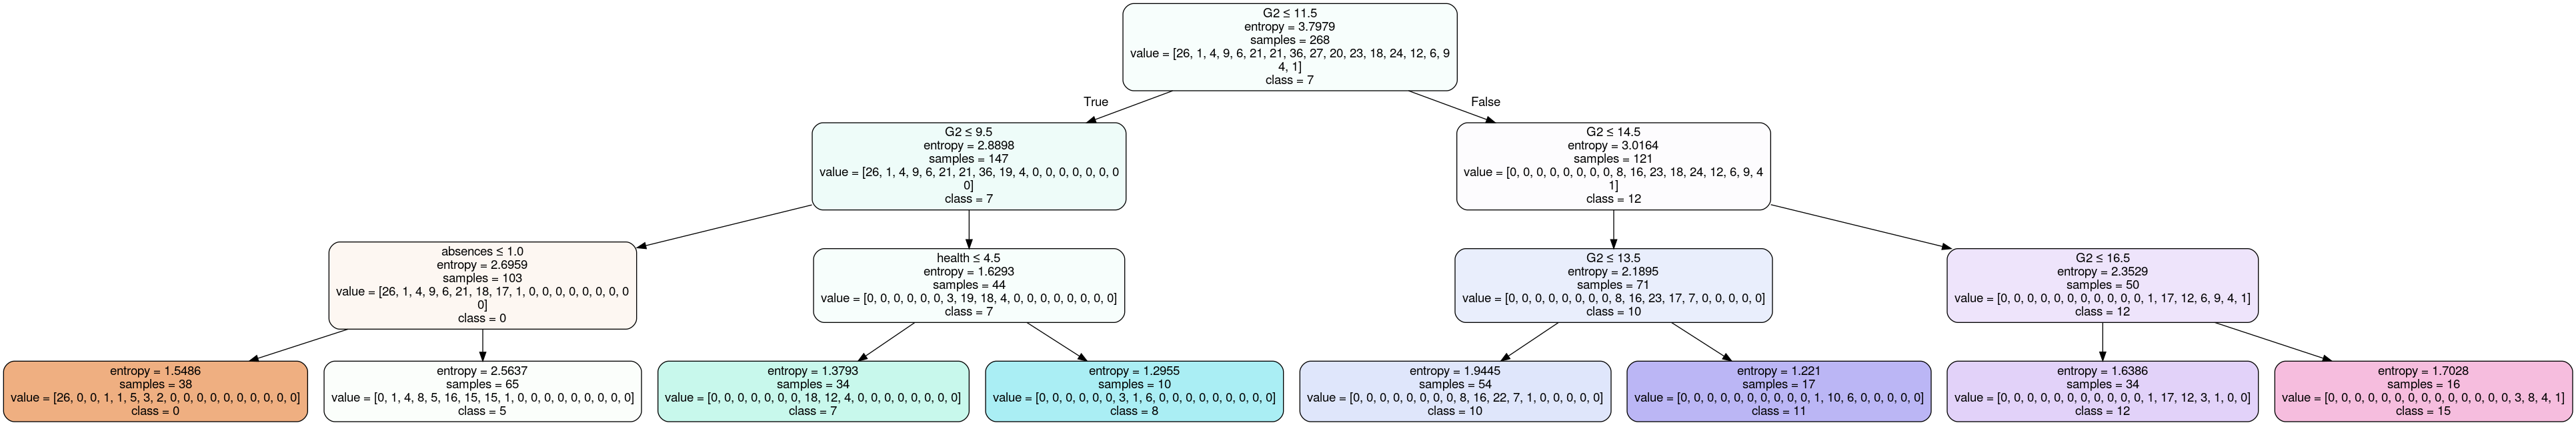

In [43]:
#diplay the tuned decision tree model 
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names = feature_cols,
               class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('student.png')
Image(graph.create_png())

In [44]:
import matplotlib.pyplot as plt 
print(df.describe())

           school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.116456    1.473418   16.696203    1.222785    1.288608    1.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      1.000000    1.000000   15.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000   16.000000    1.000000    1.000000    2.000000   
50%      1.000000    1.000000   17.000000    1.000000    1.000000    2.000000   
75%      1.000000    2.000000   18.000000    1.000000    2.000000    2.000000   
max      2.000000    2.000000   22.000000    2.000000    2.000000    2.000000   

             Medu        Fedu        Mjob        Fjob     ...          famrel  \
count  395.000000  395.000000  395.000000  395.000000     ...      395.000000   
mean     2.749367    2.521519    3.169620    3.281013     ...        3.944304   
std      1.094735    1.0882